In [6]:
import sys
sys.path.append('../')

import torch
from train import train

from src.config import get_config
from src.dataset import DataGenerator1D
from src.equation import BoundaryCondition, Burgers1D, InitialCondition
from src.geometry import Rectangle1D
from src.models import Mlp, ResNet

In [7]:
PARAMS_PATH = "/workspaces/pytorch-PINN/results/2023-06-29_07:38:22/model.pt"

In [8]:
config = get_config()

In [9]:
cfg_model = config.model_config
model = Mlp(cfg_model.units, activation=torch.nn.Tanh)
model.eval()

Mlp(
  (layers): ModuleList(
    (0): Linear(in_features=2, out_features=128, bias=True)
    (1): Tanh()
    (2): Linear(in_features=128, out_features=128, bias=True)
    (3): Tanh()
    (4): Linear(in_features=128, out_features=128, bias=True)
    (5): Tanh()
    (6): Linear(in_features=128, out_features=1, bias=True)
    (7): Tanh()
  )
)

In [10]:
model.load_state_dict(torch.load(PARAMS_PATH))

<All keys matched successfully>

In [11]:
def u_sol(t, x):
    u = model(torch.cat([t[:, None], x[:, None]], dim=-1))
    return u.squeeze()

In [17]:
x = torch.linspace(-1, 1, 500)
t = torch.linspace(0, 1, 11)

In [24]:
u = u_sol(torch.ones_like(x)*t[0], x)

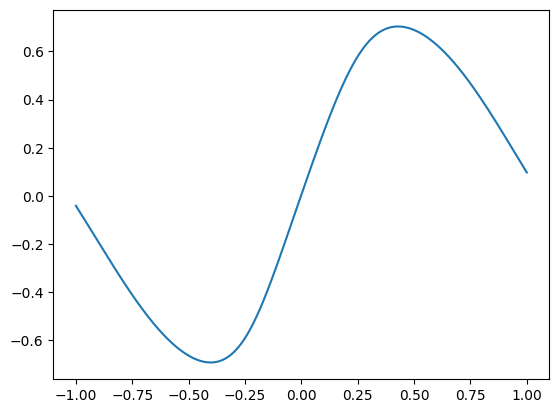

In [25]:
import matplotlib.pyplot as plt
plt.plot(x, u.detach().numpy())